# K-Nearest Neighbor Algorithm on Iris Dataset
In the following program we run a K-Nearest Neighbor Classifier on the Iris Dataset.
We split the dataset into a train and test set, and determine for each test example what
the 5 nearest datapoints are in the training set. The label we assign will be determined
by which label gets the majority vote. 

In order to make the example clear and simple, we will only focus on class 1 (versicolor) and 2 (virginica),
to make it a binary classification problem. 

In [57]:
# ========== Part 1: importing the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib import cm


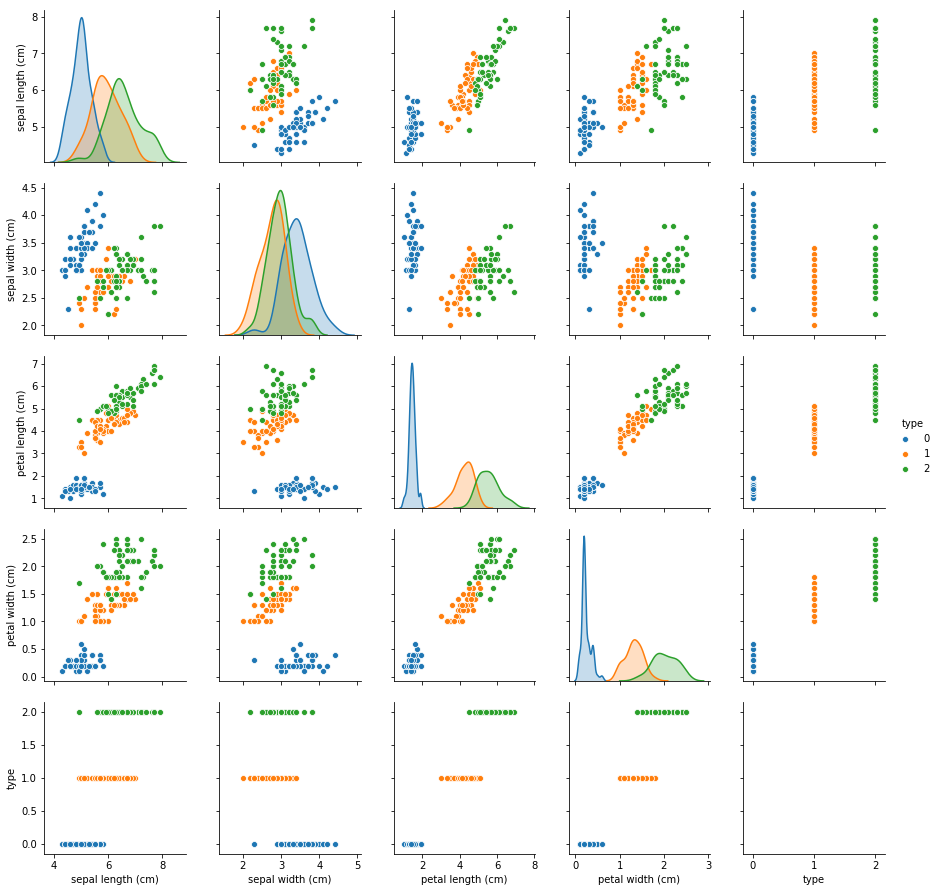

In [59]:
# ========== Part 2: importing the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
df['type'] = iris['target']
#df['type'] = df['type'].map({0:'setosa',1:'versicolor',2:'virginica'})

sns.pairplot(df,hue='type');


In [60]:
# ========== Part 3: Feature Normalization and Splitting data into Train and Test set.
X = df.iloc[50:,:4].values
y = df.iloc[50:,4].values

# Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.fit_transform(X_test)


In [61]:
# ========== Part 4: K-Nearest Neighbor Algorithm

def dist(a,b):
    return np.linalg.norm(a-b)

class KNN(object):
    def KNearestNeighbor(self,X_train_std,X_test_std):
        k = 5
        votes = np.zeros((len(X_test_std),k))
        majority_vote = np.zeros(len(X_test_std))
        for i in range(len(X_test)):
            # checking the distances for each test example to all training examples
            distances = [dist(X_test_std[i],b) for b in X_train_std]
            # sorting the distances from low to high
            sorted_distances = sorted(distances)
            # pick the k shortest distances
            k_nn = sorted_distances[0:k]
            for j in range(len(k_nn)):
                # getting the index number of the 5 shortest distances from the original distance matrix
                index = distances.index(k_nn[j])
                # getting the y-labels corresponding to the KNN
                votes[i,j] = y_train[index]
                
        for i in range(len(votes)):
            # calculating the sum over the KNN (here labels are 1's or 2's)
            majority_vote[i] = votes[i,:].sum()
            
        for j in range(len(majority_vote)):
            # if majority vote <= 7 then the majority of the labels much be 1s
            if majority_vote[j] <= 7:
                majority_vote[j] = 1
            # if majority vote > 7, then the majority of the labels must be 2s
            else:
                majority_vote[j] = 2
            
        return majority_vote
                                 
y_pred = KNN().KNearestNeighbor(X_train_std,X_test_std)                                          

Our KNN classifier has an accuracy of 

92.00%


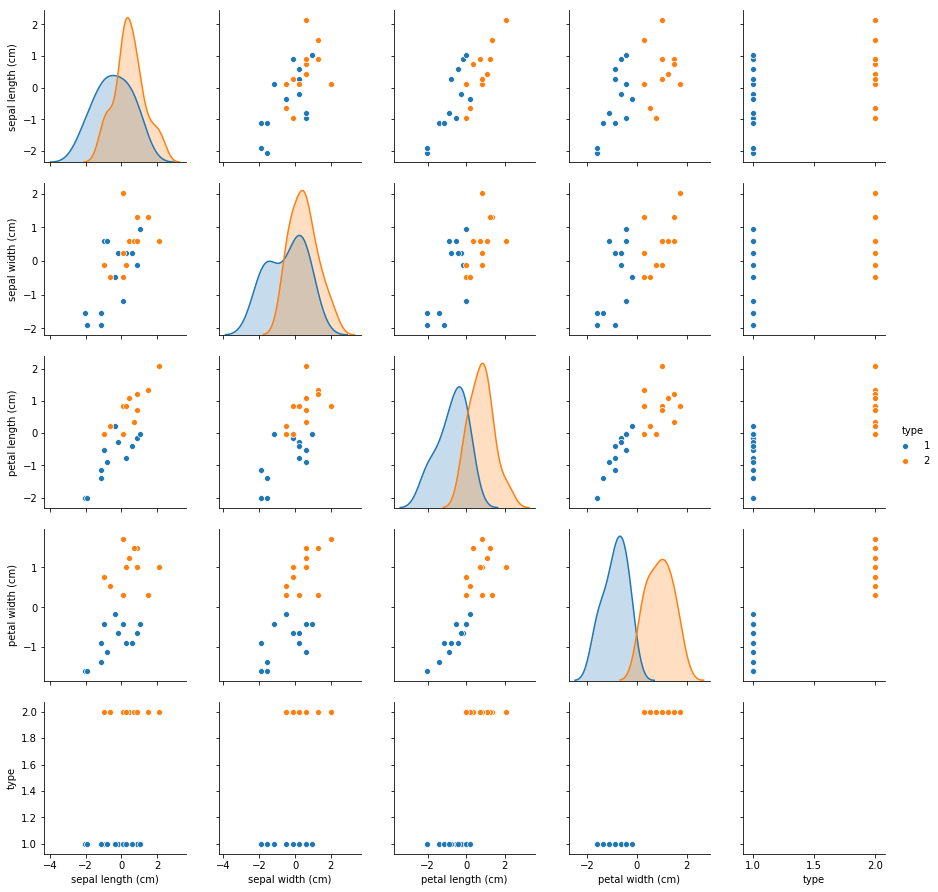

In [63]:
# ========== Part 5: Here we check the accuracy of our algorithm against the actual target labels of our test set
# comparing the y_prediction with the actual y-label

correct = y_pred == y_test

print('Our KNN classifier has an accuracy of \n')
accuracy = correct.mean()*100
print("{:.2f}".format(accuracy) + str("%"))

# plotting the X_test_std Matrix as a function of the actual labels to see how our test data clusters look like
df_test = pd.DataFrame(data = X_test_std,columns = iris['feature_names'])
df_test['type'] = y_test

sns.pairplot(df_test,hue="type");

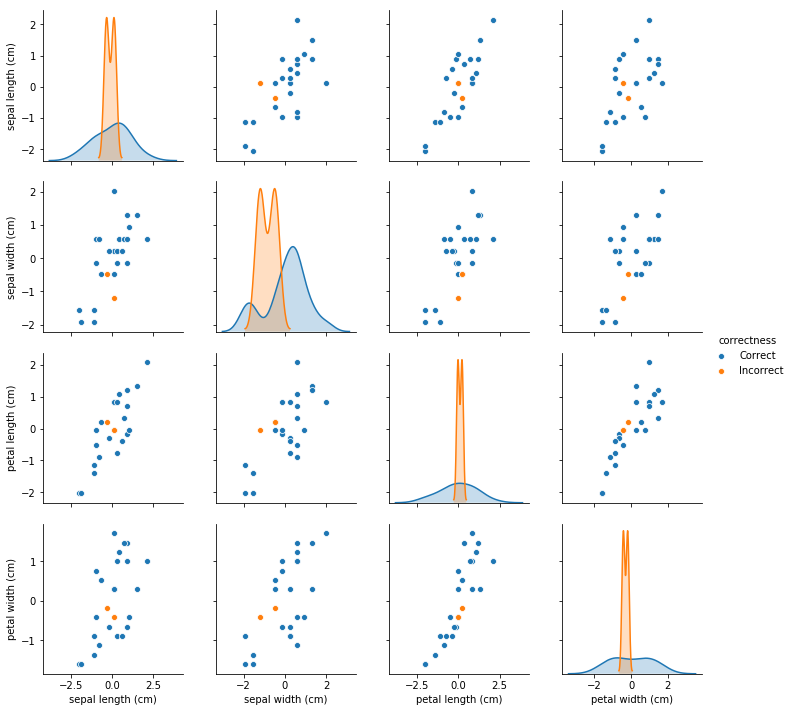

In [64]:
# plotting the X_test_std Matrix as a function of the predicted labels to see which datapoints were 
# classified incorrectly.

df_test = pd.DataFrame(data = X_test_std,columns = iris['feature_names'])
df_test['correctness'] = correct
df_test['correctness'] = df_test['correctness'].map({False:'Incorrect',True: 'Correct'})

sns.pairplot(df_test,hue="correctness");